<a href="https://colab.research.google.com/github/omid-sakaki-ghazvini/Machine-Learning/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-preparation-example/credit_risk_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [ ]:
df = pd.read_csv('/kaggle/input/data-preparation-example/credit_risk_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# **Data Analysis**

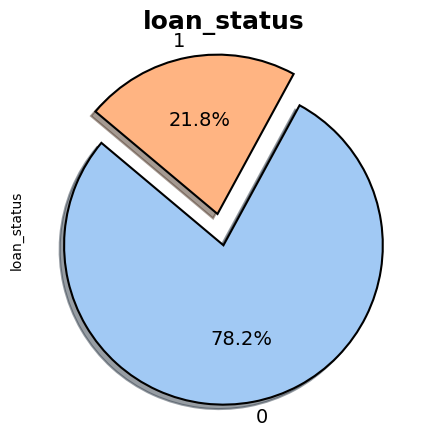

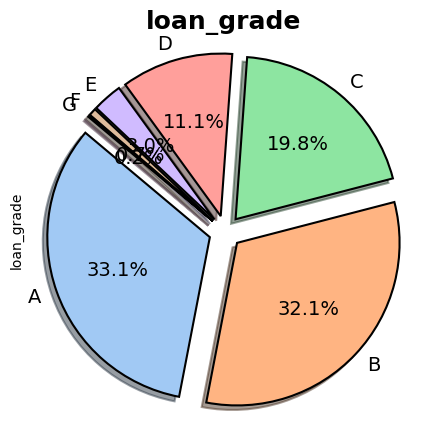

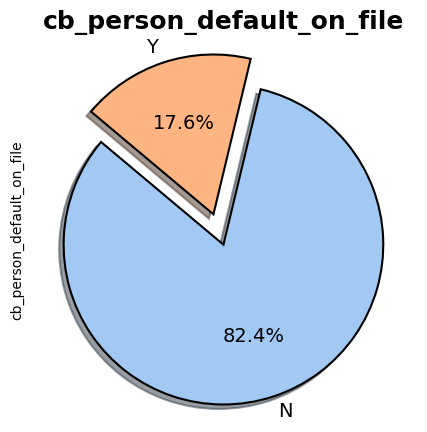

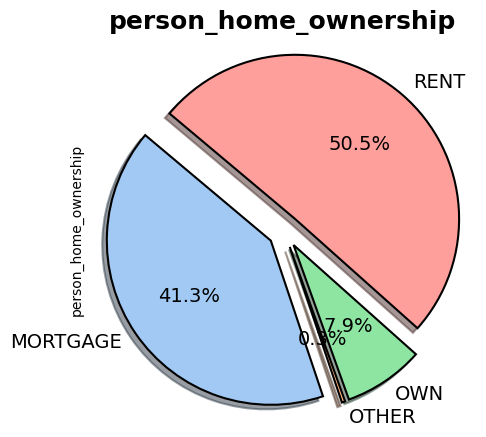

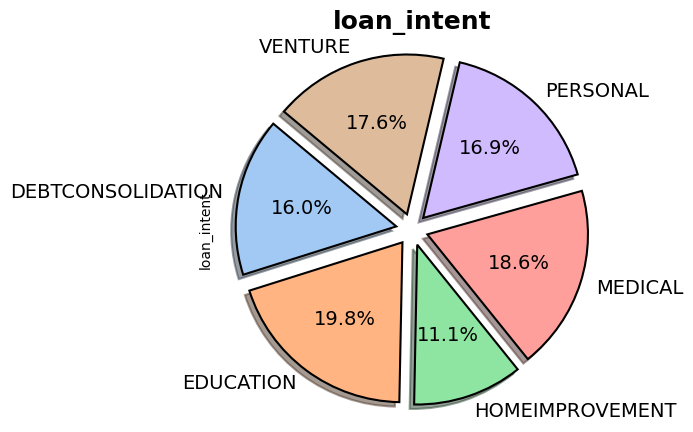

In [ ]:
columns = {
    'loan_status': df['loan_status'],
    'loan_grade': df['loan_grade'],
    'cb_person_default_on_file': df['cb_person_default_on_file'],
    'person_home_ownership': df['person_home_ownership'],
    'loan_intent': df['loan_intent'],
}

def plot_data(name, data):
    plt.figure(figsize=(5, 5))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(data.nunique())]

    target_counts = df.groupby(name)[name].count()

    target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )

    plt.title(name, fontsize=18, weight='bold')
    plt.axis('equal')
    plt.show()


for name, data in columns.items():
    plot_data(name, data)

# **step 1 : Handle Missing Values & Data Cleaning**

# [Data Cleaning Notebook](http://www.kaggle.com/code/omidsakaki1370/data-cleaning)
# [Missing Values Notebook](http://www.kaggle.com/code/omidsakaki1370/missing-values)

## **1-Normalization**

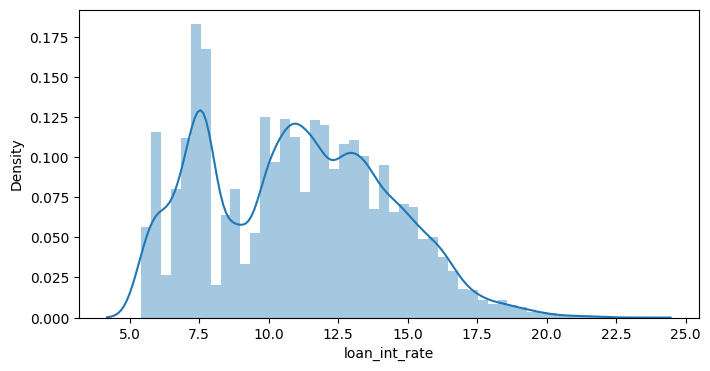

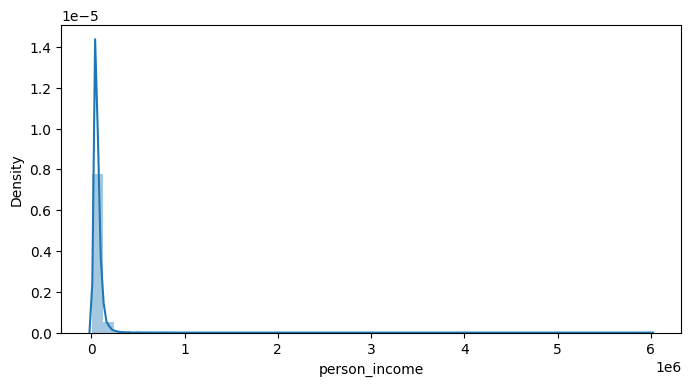

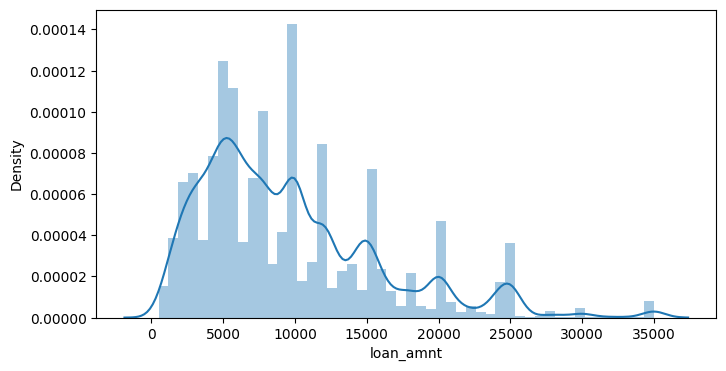

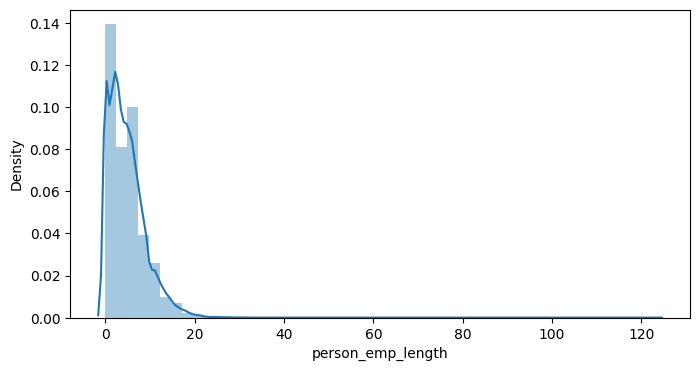

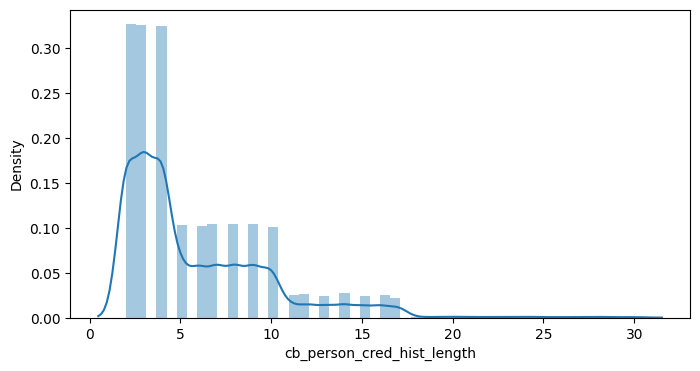

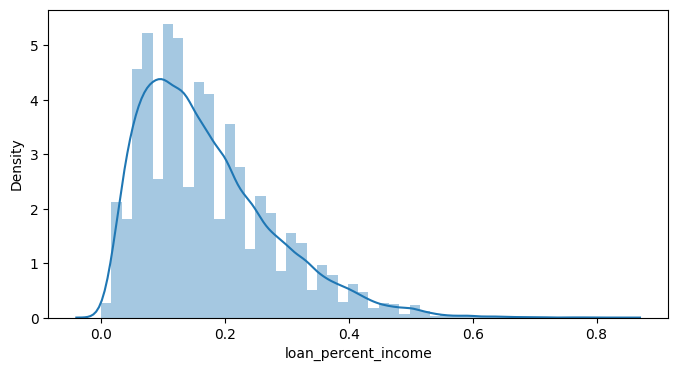

In [ ]:
columns = {'person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length'}

def distplot_data(data):
    plt.figure(figsize=(8, 4))
    sns.distplot(data);

for i in columns:
    distplot_data(df[i])

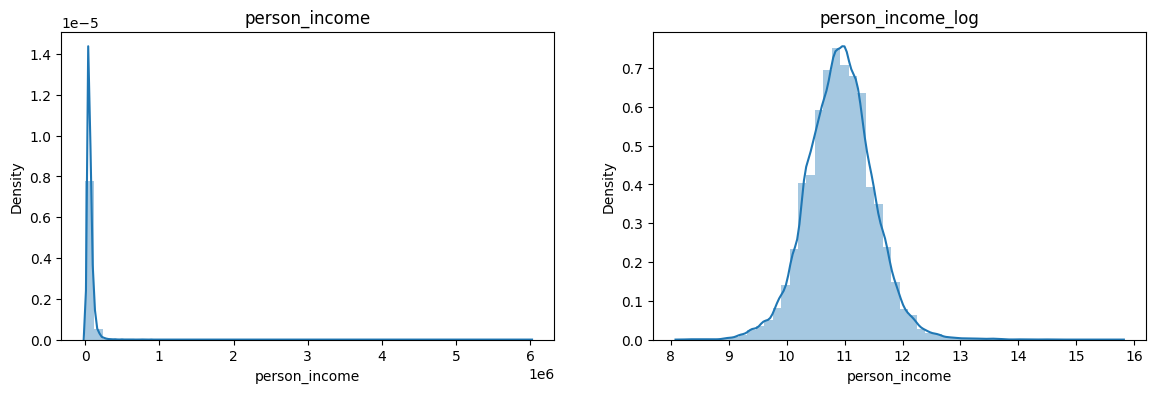

In [ ]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)

sns.distplot(df['person_income']);
ax1.set_title("person_income");

df['person_income'] = np.log(df['person_income'])

ax1 = plt.subplot(122)
sns.distplot(df['person_income']);
ax1.set_title("person_income_log");

## **2-Outliers**

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df = remove_outliers(df, 'person_age')
df = remove_outliers(df, 'person_income')
df = remove_outliers(df, 'person_emp_length')
df = remove_outliers(df, 'cb_person_cred_hist_length')
df.reset_index(drop=True, inplace=True)

## **3-Encoder**

In [ ]:
encoder=LabelEncoder()

df['person_home_ownership']=encoder.fit_transform(df['person_home_ownership'])
df['loan_intent']=encoder.fit_transform(df['loan_intent'])
df['loan_grade']=encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=encoder.fit_transform(df['cb_person_default_on_file'])

## **4-missing values**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2679
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df = df.fillna(method = 'ffill')
missing_values_count = df.isnull().sum()

print(missing_values_count)
df.head(10)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,11.089805,3,4.0,3,2,35000,15.23,1,0.53,0,2
1,24,10.904119,3,8.0,3,2,35000,14.27,1,0.55,1,4
2,26,11.252859,3,8.0,1,1,35000,12.42,1,0.45,0,3
3,24,11.276646,3,5.0,3,1,35000,11.11,1,0.44,0,4
4,24,11.326596,3,8.0,4,0,35000,8.90,1,0.42,0,2
5,22,11.350407,3,6.0,5,1,35000,10.37,1,0.41,0,4
6,23,11.461632,3,2.0,5,0,35000,7.90,1,0.37,0,2
7,26,11.591367,3,4.0,1,4,35000,18.39,1,0.32,0,4
8,23,11.652687,3,2.0,1,0,35000,7.90,0,0.30,0,4
9,23,11.695247,3,0.0,1,0,35000,7.90,0,0.29,0,4


In [ ]:
X = df.copy()
y = X.pop("loan_status")

# **step 2 : Feature Engineering**

# [Feature Engineering Notebook](https://www.kaggle.com/code/omidsakaki1370/feature-engineering)

In [ ]:
X_test = X.copy()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
X_new = selector.fit_transform(X_test, y)

print('X shape :', X.shape)
print('X_new shape :', X_new.shape)

X shape : (28140, 11)
X_new shape : (28140, 11)


## **Creating Features**

In [ ]:
X.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,11.089805,3,4.0,3,2,35000,15.23,0.53,0,2
1,24,10.904119,3,8.0,3,2,35000,14.27,0.55,1,4
2,26,11.252859,3,8.0,1,1,35000,12.42,0.45,0,3
3,24,11.276646,3,5.0,3,1,35000,11.11,0.44,0,4
4,24,11.326596,3,8.0,4,0,35000,8.90,0.42,0,2
5,22,11.350407,3,6.0,5,1,35000,10.37,0.41,0,4
6,23,11.461632,3,2.0,5,0,35000,7.90,0.37,0,2
7,26,11.591367,3,4.0,1,4,35000,18.39,0.32,0,4
8,23,11.652687,3,2.0,1,0,35000,7.90,0.30,0,4
9,23,11.695247,3,0.0,1,0,35000,7.90,0.29,0,4


In [ ]:
X["New_Features"] = round(X.loan_int_rate - X.person_income).astype(int)

X[["loan_int_rate", "person_income", "New_Features"]].head(10)

,loan_int_rate,person_income,New_Features
0,15.23,11.089805,4
1,14.27,10.904119,3
2,12.42,11.252859,1
3,11.11,11.276646,0
4,8.90,11.326596,-2
5,10.37,11.350407,-1
6,7.90,11.461632,-4
7,18.39,11.591367,7
8,7.90,11.652687,-4
9,7.90,11.695247,-4


In [ ]:
def F(x):
    if x>=0:
        return 1
    else:
        return 0

X['New_Features'] = X['New_Features'].apply(F)

print(X['New_Features'].head(10))
print(y.head(10))

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: New_Features, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: loan_status, dtype: int64


## **Clustering With K-Means**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,New_Features,Cluster
0,23,11.089805,3,4.0,3,2,35000,15.23,0.53,0,2,1,2
1,24,10.904119,3,8.0,3,2,35000,14.27,0.55,1,4,1,2
2,26,11.252859,3,8.0,1,1,35000,12.42,0.45,0,3,1,2
3,24,11.276646,3,5.0,3,1,35000,11.11,0.44,0,4,1,2
4,24,11.326596,3,8.0,4,0,35000,8.90,0.42,0,2,0,2


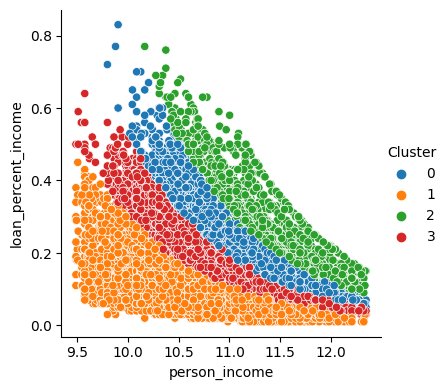

In [ ]:
sns.relplot(x="person_income", y="loan_percent_income", hue="Cluster", data=X, height=4);

# **step 3 : Classification**

In [ ]:
#confusion matrix template
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## **1-Split Data**

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,11.089805,3,4.0,3,2,35000,15.23,1,0.53,0,2
1,24,10.904119,3,8.0,3,2,35000,14.27,1,0.55,1,4
2,26,11.252859,3,8.0,1,1,35000,12.42,1,0.45,0,3
3,24,11.276646,3,5.0,3,1,35000,11.11,1,0.44,0,4
4,24,11.326596,3,8.0,4,0,35000,8.90,1,0.42,0,2


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(columns = ['loan_status'],axis=1)
y=df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (21105, 11)
The size of the output train data is: (21105,)
The size of the input test data is: (7035, 11)
The size of the output test data is: (7035,)


## **2-Scaler**

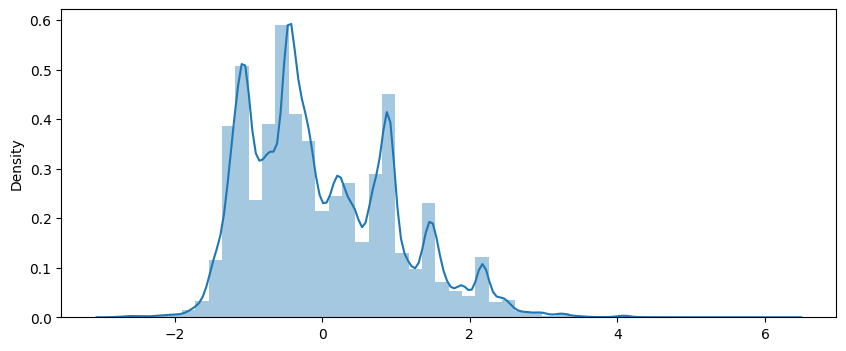

In [ ]:
scaler_data = StandardScaler()

X_train_scaled = scaler_data.fit_transform(X_train)
X_test_scaled = scaler_data.fit_transform(X_test)

fig = plt.figure(figsize=(10, 4))
sns.distplot(X_train_scaled);

## **3-Logistic Regression**

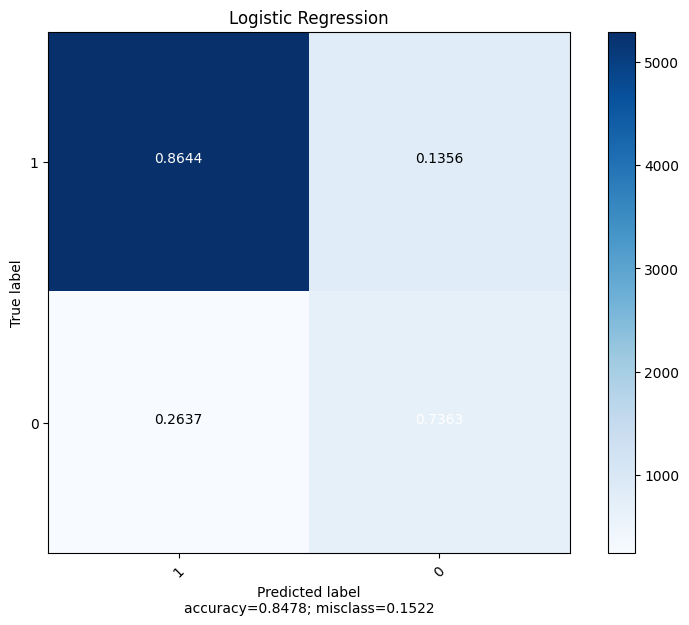

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6121
           1       0.45      0.74      0.56       914

    accuracy                           0.85      7035
   macro avg       0.70      0.80      0.73      7035
weighted avg       0.89      0.85      0.86      7035



In [ ]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)

# Prediction
prediction=LR.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Logistic Regression',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **4-Decision Tree**

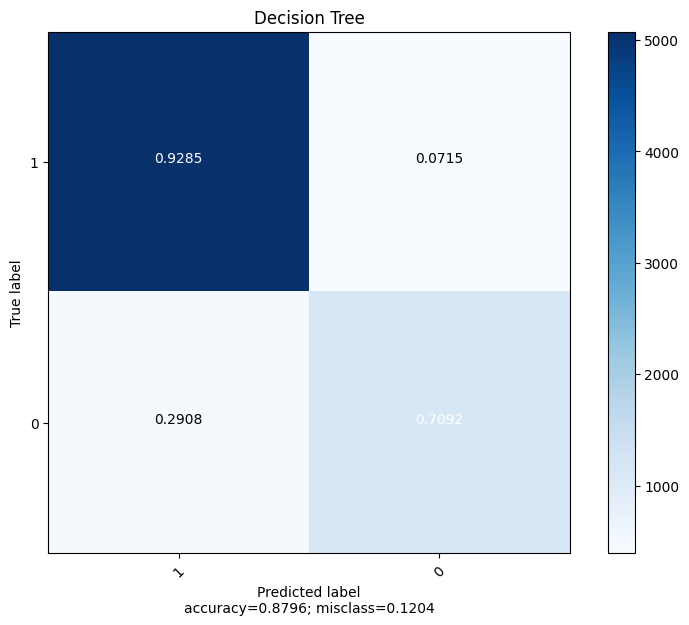

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5467
           1       0.74      0.71      0.72      1568

    accuracy                           0.88      7035
   macro avg       0.83      0.82      0.82      7035
weighted avg       0.88      0.88      0.88      7035



In [ ]:
# import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# Decision Tree
Tree = DecisionTreeClassifier()
Tree.fit(X_train_scaled,y_train)

# Prediction
prediction=Tree.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Decision Tree',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **5-Random Forest**

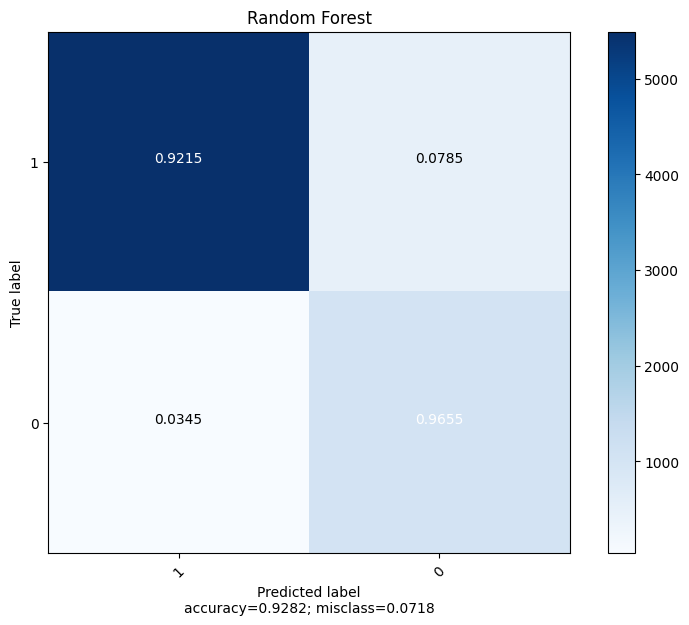

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5963
           1       0.69      0.97      0.80      1072

    accuracy                           0.93      7035
   macro avg       0.84      0.94      0.88      7035
weighted avg       0.95      0.93      0.93      7035



In [ ]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

# Prediction
prediction=RF.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Random Forest',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **6-Support Vector Machine**

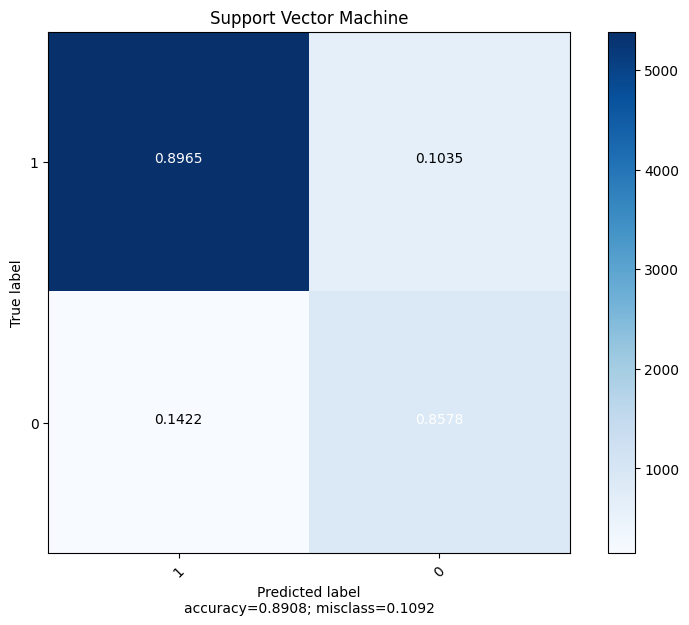

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6008
           1       0.59      0.86      0.70      1027

    accuracy                           0.89      7035
   macro avg       0.78      0.88      0.81      7035
weighted avg       0.92      0.89      0.90      7035



In [ ]:
# import the necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# Support Vector Machine
SVM = SVC()
SVM.fit(X_train_scaled,y_train)

# Prediction
prediction=SVM.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Support Vector Machine',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **7-k-nearest neighbor**

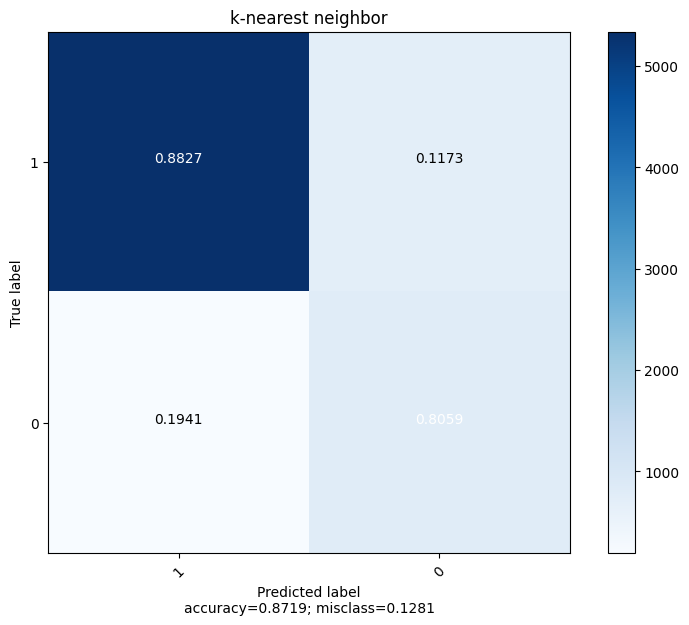

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6051
           1       0.53      0.81      0.64       984

    accuracy                           0.87      7035
   macro avg       0.75      0.84      0.78      7035
weighted avg       0.90      0.87      0.88      7035



In [ ]:
# import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# k-nearest neighbor
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train_scaled,y_train)

# Prediction
prediction=KNN.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='k-nearest neighbor',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **8-Gradient Boosting**

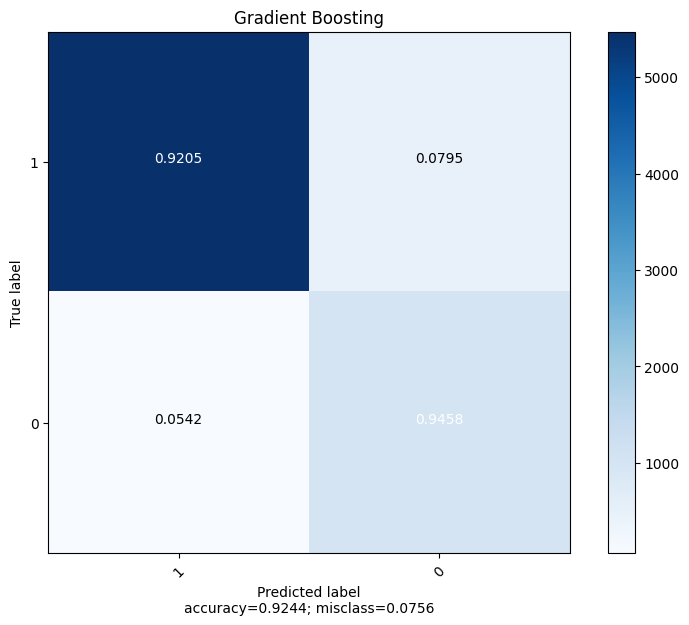

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      5946
           1       0.69      0.95      0.79      1089

    accuracy                           0.92      7035
   macro avg       0.84      0.93      0.87      7035
weighted avg       0.94      0.92      0.93      7035



In [ ]:
# import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# Gradient Boosting
GB = GradientBoostingClassifier( n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5)
GB.fit(X_train_scaled,y_train)

# Prediction
prediction=GB.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Gradient Boosting',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **9-MLP**

Iteration 1, loss = 0.53636892
Iteration 2, loss = 0.44606829
Iteration 3, loss = 0.41480505
Iteration 4, loss = 0.39823021
Iteration 5, loss = 0.38807166
Iteration 6, loss = 0.38128248
Iteration 7, loss = 0.37633293
Iteration 8, loss = 0.37261037
Iteration 9, loss = 0.36964166
Iteration 10, loss = 0.36716891
Iteration 11, loss = 0.36507917
Iteration 12, loss = 0.36321959
Iteration 13, loss = 0.36155611
Iteration 14, loss = 0.36004106
Iteration 15, loss = 0.35864303
Iteration 16, loss = 0.35731477
Iteration 17, loss = 0.35609600
Iteration 18, loss = 0.35492031
Iteration 19, loss = 0.35381280
Iteration 20, loss = 0.35274351
Iteration 21, loss = 0.35172193
Iteration 22, loss = 0.35077232
Iteration 23, loss = 0.34984858
Iteration 24, loss = 0.34891225
Iteration 25, loss = 0.34806043
Iteration 26, loss = 0.34722337
Iteration 27, loss = 0.34641797
Iteration 28, loss = 0.34564055
Iteration 29, loss = 0.34489640
Iteration 30, loss = 0.34415641
Iteration 31, loss = 0.34346577
Iteration 32, los

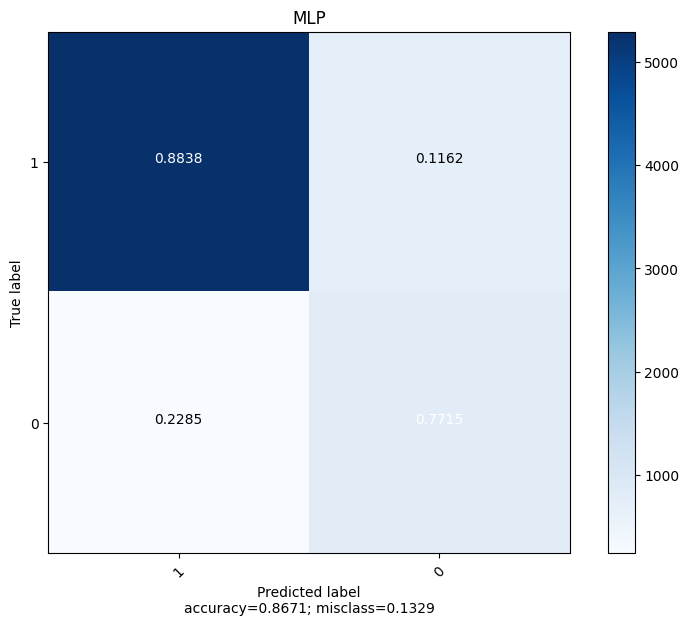

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5989
           1       0.54      0.77      0.63      1046

    accuracy                           0.87      7035
   macro avg       0.75      0.83      0.78      7035
weighted avg       0.89      0.87      0.88      7035



In [ ]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(512), max_iter=50, solver='sgd', random_state=1, verbose=True)
MLP.fit(X_train_scaled, y_train)

# Prediction
prediction=MLP.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='MLP',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **10-Voting Classifier**

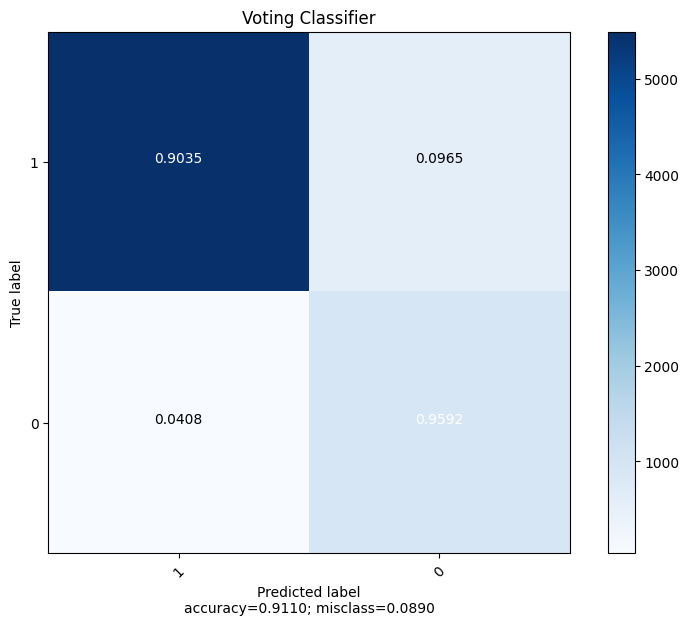

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      6080
           1       0.61      0.96      0.75       955

    accuracy                           0.91      7035
   macro avg       0.80      0.93      0.85      7035
weighted avg       0.94      0.91      0.92      7035



In [ ]:
from sklearn.ensemble import VotingClassifier

Voting = VotingClassifier(
    estimators=[("Logistic Regression", LR), ("Decision Tree", Tree), ("Random Forest", RF),
               ("Support Vector Machine",SVM), ("k-nearest neighbor",KNN), ("Gradient Boosting",GB)],
    voting='hard',
)

Voting.fit(X_train_scaled,y_train)

# Prediction
prediction=Voting.predict(X_test_scaled)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Voting Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

## **11-Cross-Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X_train_scaled, y_train):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    Voting.fit(xtr, ytr)
    pred_test = Voting.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 10
accuracy_score 0.8460445286594032

2 of kfold 10
accuracy_score 0.8593083846518238

3 of kfold 10
accuracy_score 0.8678351492183799

4 of kfold 10
accuracy_score 0.8564661297963051

5 of kfold 10
accuracy_score 0.8578872572240644

6 of kfold 10
accuracy_score 0.8630331753554502

7 of kfold 10
accuracy_score 0.8516587677725118

8 of kfold 10
accuracy_score 0.8545023696682464

9 of kfold 10
accuracy_score 0.8530805687203792

10 of kfold 10
accuracy_score 0.8691943127962085

Mean validation accuracy:  0.8579010643862771


In [ ]:
from statistics import stdev
from sklearn.model_selection import cross_val_score

score = cross_val_score(Voting, X_train_scaled, y_train, cv=5, scoring='recall')

Voting_cv_score = score.mean()
Voting_cv_stdev = stdev(score)

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', Voting_cv_score)
print('Cross Validation Recall standard deviation: ', Voting_cv_stdev)

Cross Validation Recall scores are: [0.59156493 0.618202   0.59045505 0.61529933 0.61419069]
Average Cross Validation Recall score:  0.6059423995511269
Cross Validation Recall standard deviation:  0.013715446840464022


## **12-Pipelines**

In [ ]:
df = pd.read_csv('/kaggle/input/data-preparation-example/credit_risk_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Separate target from predictors
y = df.loan_status
X = df.drop(['loan_status'], axis=1)

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (24435, 11)
The size of the output train data is: (24435,)
The size of the input test data is: (8146, 11)
The size of the output test data is: (8146,)


In [ ]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

print("Categorical variables:")
print(categorical_cols)
print("numerical variables:")
print(numerical_cols)

Categorical variables:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical variables:
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler()),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

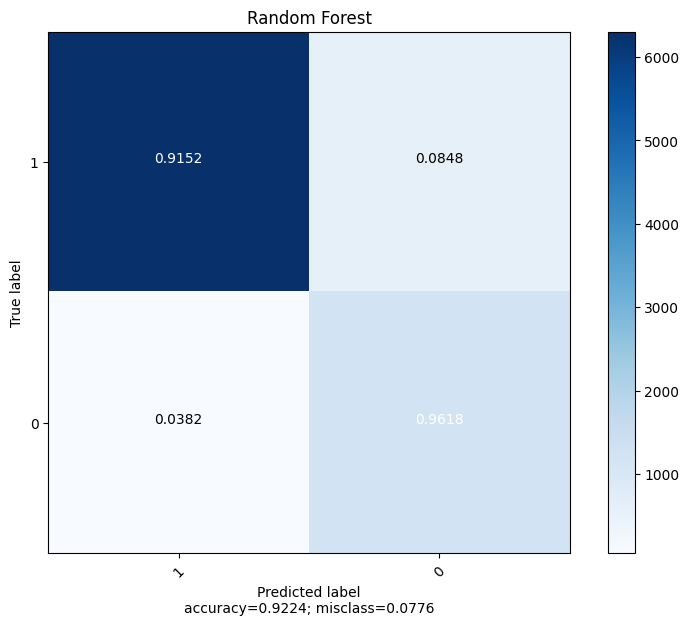

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6888
           1       0.67      0.96      0.79      1258

    accuracy                           0.92      8146
   macro avg       0.83      0.94      0.87      8146
weighted avg       0.94      0.92      0.93      8146



In [ ]:
# Voting Classifier
model = VotingClassifier(
    estimators=[("Logistic Regression", LR), ("Decision Tree", Tree), ("Random Forest", RF),
               ("Support Vector Machine",SVM), ("k-nearest neighbor",KNN), ("Gradient Boosting",GB)],
    voting='hard',
)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
prediction = my_pipeline.predict(X_test)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Random Forest',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)